In [ ]:
#import required libraries
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest

In [ ]:
#download dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']


In [ ]:
data.shape

(699, 11)

In [ ]:

data1=data.drop( 'Sample code',axis=1)

In [ ]:
data1.shape

(699, 10)

In [ ]:
print(data1.shape)
print('------------------------')
print(data1.head())
print('------------------------')
print(data1.info())
print('------------------------')
print(data1.describe())

(699, 10)
------------------------
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3         

In [ ]:
#To set 'nan' string in the missing value
data1 = data1.replace('?',np.nan)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
#Find the number of each columns missing values
for col in data1.columns:
 print(f"{col} = {data1[col].isnull().sum()}")


Clump Thickness = 0
Uniformity of Cell Size = 0
Uniformity of Cell Shape = 0
Marginal Adhesion = 0
Single Epithelial Cell Size = 0
Bare Nuclei = 16
Bland Chromatin = 0
Normal Nucleoli = 0
Mitoses = 0
Class = 0


In [ ]:
data2=data1['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])
data4 = pd.to_numeric(data2)

# Replace missing values with median
data4=data4.fillna(data4.median())

print('\nAfter replacing missing values:')
print(data4[20:25])
data['Bare Nuclei']=data4


Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [ ]:
print(f"Number of rows in original data = {data1.shape[0]}")
data2.dropna()

Number of rows in original data = 699


,Bare Nuclei
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


In [ ]:
data1.describe().head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000


<Axes: >

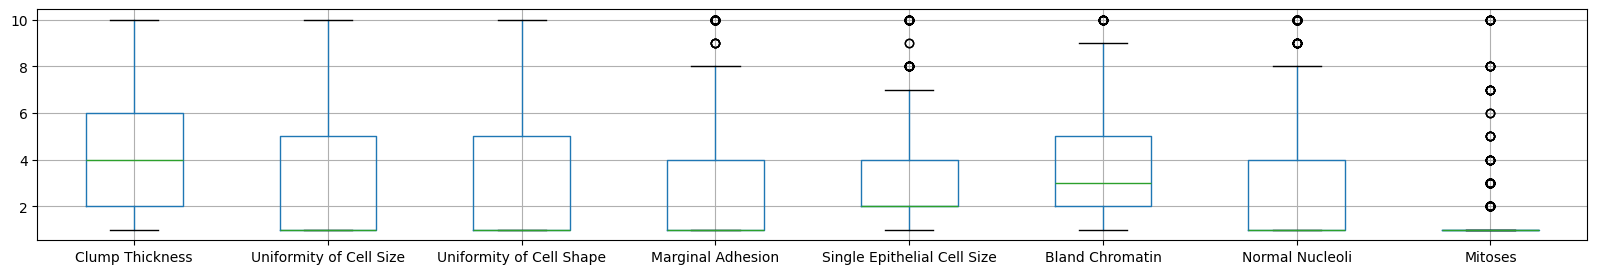

In [ ]:

%matplotlib inline

if 'Class' in data1.columns:
    data77 = data1.drop(['Class'],axis=1)
else:
    data77 = data1.copy()
data1.boxplot(figsize=(20,3))

In [ ]:
Z = (data1-data1.mean())/data1.std()
Z[222:250]

,Bare Nuclei
222,0.417896
223,1.246184
224,1.798376
225,-0.686488
226,1.798376
227,0.417896
228,-0.686488
229,1.798376
230,0.970088
231,1.246184


<Axes: >

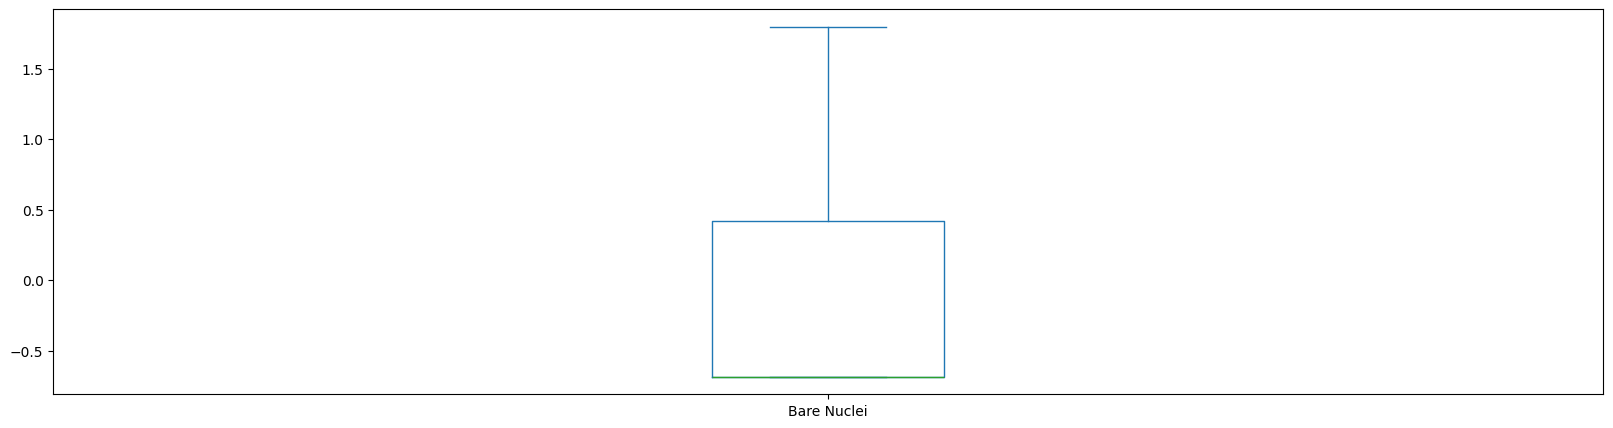

In [ ]:
Z.plot.box(figsize=(20,5))

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

# Filter the Z Series to keep only values within -3 and 3 standard deviations
Z2 = Z[(Z > -3) & (Z <= 3)]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outliers = 699


In [ ]:
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')
data.loc[[11,28]]

Number of duplicate rows = 9


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
11,1036172,2,1,1,1,2,1.0,2,1,1
28,1067444,2,1,1,1,2,1.0,2,1,1


In [ ]:
dups = data.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')
data.loc[[11,28]]

Number of duplicate rows = 9


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,1036172,2,1,1,1,2,1.0,2,1,1,2
28,1067444,2,1,1,1,2,1.0,2,1,1,2


In [ ]:
print(f'Number of rows before discarding duplicates = {(data.shape[0])}')
data2 = data.drop_duplicates()
print(f'Number of rows after discarding duplicates ={(data2.shape[0])}')

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates =690
